<a href="https://colab.research.google.com/github/Samson-Antony/final-project/blob/master/integraion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pls enter your inputs here

# sec=10
# marks=[(65,75,95,98,99)]

sec=12
marks=[(65,75,95,98,99,89,0,0,0,0)]

course='B.Sc. Zoology'

In [62]:
from google.colab import files
uploaded = files.upload()

Saving main file.csv to main file (1).csv
Saving details.csv to details (1).csv
Saving Book2.csv to Book2 (1).csv
Saving Book1.csv to Book1 (1).csv


In [0]:
import pandas as pd 
if sec==12 :
  data = pd.read_csv("Book2.csv") #change file name to a valid one
else:
  data = pd.read_csv("Book1.csv") #change file name to a valid one

In [0]:
X=data.iloc[:,:-1]

In [0]:
y= data.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2) 

In [67]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnb.predict(X_test) 

In [70]:
from sklearn import metrics 

print("Gaussian Naive Bayes model accuracy(in %) of predicting course based on mark:", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) of predicting course based on mark: 62.0


In [0]:
y_pred = gnb.predict(marks)

In [72]:
y_pred

array(['engg'], dtype='<U4')

In [0]:
df =  pd.read_csv("main file.csv") #change file name to a valid one

In [0]:
movie_titles = pd.read_csv('details.csv') #change file name to a valid one

In [0]:
data = pd.merge(df, movie_titles, on='Item_id') # change item id to group id

In [0]:
# data.groupby('Course')['rating'].mean().sort_values(ascending=False).head()

In [0]:
ratings = pd.DataFrame(data.groupby('Course')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('Course')['rating'].count()) 


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('dark') 
%matplotlib inline 

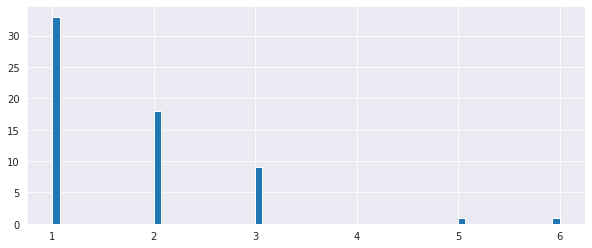

In [79]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

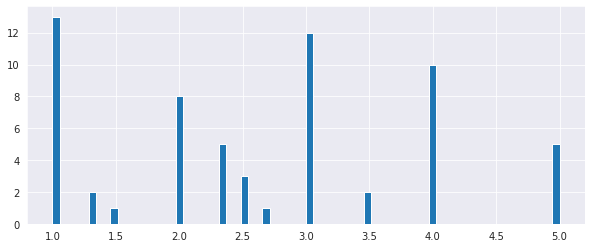

In [80]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

In [0]:
# Sorting values according to  
# the 'num of rating column' 
coursemat = data.pivot_table(index ='userid', 
              columns ='Course', values ='rating') 
  
# ratings.sort_values('num of ratings', ascending = False)

In [0]:

Course_ratings = coursemat[course] 

# Course_ratings.head() 

In [89]:
# analysing correlation with similar movies 
similar_course = coursemat.corrwith(Course_ratings) 
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_course = pd.DataFrame(similar_course, columns =['Correlation']) 
corr_course.dropna(inplace = True) 
  
corr_course.head() 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
Course,
B.Sc. Biochemistry,-1.0
B.Sc. Botany,1.0
B.Sc. Zoology,1.0


In [55]:
# Similar movies like starwars corr_starwars.sort_values('Correlation', ascending = False).head(10) 
# corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
# corr_starwars.head() 
  
# corr_starwars[corr_starwars['num of ratings']>10].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
Course,,
